# Testing Data Analytics for Multiple parlay return simulated annueling (SA_MP)
* uses highest risk as optimization target 'Value" 
* tested using theoretical games generated by a script
* tested against a brute force search algorithm for correctness, which had to take much longer to run
* SA Cooling linear cooling scedulae used: temperature = temperature_init / (1 + (3 *countIter))
* SA Threshold reported is algorithm's 'initial threshold' , threshold was decreased by 20% after each parlay returned to best grouping
* 'Offset' refers to number of "Neighbors" answer was away from perfect solution
* Initial Temperature used: 100
* Through Testing Analysis we found the OPTIMAL THRESHOLD to be ~0.03
* It was impossible to test correctness after the number of games exceeded 10, as the Brute Force (BF) algorithim could no longer generate all game combinations in a reasonable amountof time, and thus was impossible to run it enoufgh times to produce meaningful testing results

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [113]:
# Load CSV file into a DataFrame
df = pd.read_csv('SA_MP_testingData.csv')

# Display the DataFrame
df

,Test_ID,numGames,numParlays,runtime,temp_threshold,SA_Correctness,SA_Offset,SA_Best_Overlap
0,0,5,2,0.0637,0.214,1.00000,0,1
1,1,4,3,0.1455,0.164,1.00000,0,3
2,2,6,2,0.0591,0.283,0.83333,4,1
3,3,9,4,0.8699,0.131,1.00000,0,3
4,4,6,3,0.2798,0.155,1.00000,0,3
...,...,...,...,...,...,...,...,...
1145,1145,6,4,7.5777,0.011,1.00000,0,4
1146,1146,7,2,2.7579,0.006,1.00000,0,2
1147,1147,5,4,5.5972,0.013,1.00000,0,4
1148,1148,7,5,14.8986,0.018,1.00000,0,5


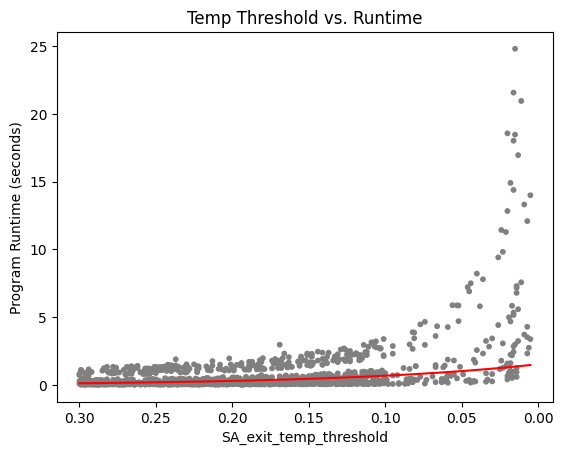

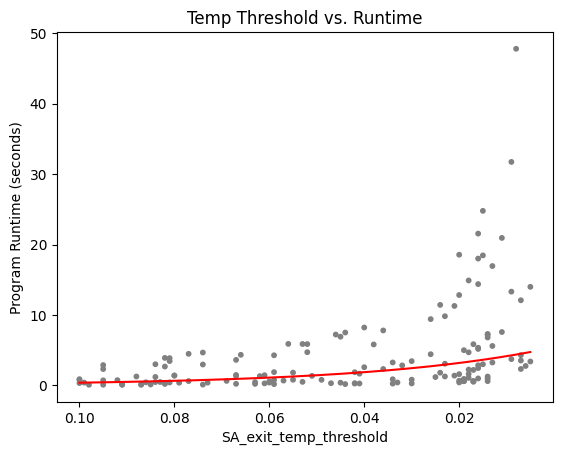

In [86]:
#exclude outliers
dfA = df[df['runtime'] <= 30]

# Select columns to plot
x = dfA['temp_threshold']
y = dfA['runtime']

# Get counts of each unique combination of x and y values
counts = dfA.groupby(['temp_threshold', 'runtime']).size().reset_index(name='count')

# Create scatter plot with point sizes based on count values
plt.scatter(x=counts['temp_threshold'], y=counts['runtime'], s=counts['count']*10, color='grey')

# Add axis labels and title
plt.xlabel('SA_exit_temp_threshold')
plt.ylabel('Program Runtime (seconds)')
plt.title('Temp Threshold vs. Runtime')

#create exponential best fit line
p = np.polyfit(x, np.log(y), 1)
a = np.exp(p[1])
b = p[0]

# Plot the exponential best-fit line
x_fit = np.linspace(x.min(), x.max(), 1000)
y_fit = a * np.exp(b * x_fit)
plt.plot(x_fit, y_fit, 'r-', label='Exponential Best Fit')

plt.gca().invert_xaxis()
# Show the graph
plt.show()


### FOR GRAPH 2 ###


#exclude outliers
df2 = df[df['temp_threshold'] <= 0.1]

# Select columns to plot
x2 = df2['temp_threshold']
y2 = df2['runtime']

# Get counts of each unique combination of x and y values
counts2 = df2.groupby(['temp_threshold', 'runtime']).size().reset_index(name='count')

# Create scatter plot with point sizes based on count values
plt.scatter(x=counts2['temp_threshold'], y=counts2['runtime'], s=counts2['count']*10, color='grey')

# Add axis labels and title
plt.xlabel('SA_exit_temp_threshold')
plt.ylabel('Program Runtime (seconds)')
plt.title('Temp Threshold vs. Runtime')

#create exponential best fit line
p2 = np.polyfit(x2, np.log(y2), 1)
a2 = np.exp(p2[1])
b2 = p2[0]

# Plot the exponential best-fit line
x_fit2 = np.linspace(x2.min(), x2.max(), 1000)
y_fit2 = a2 * np.exp(b2 * x_fit2)
plt.plot(x_fit2, y_fit2, 'r-', label='Exponential Best Fit')

plt.gca().invert_xaxis()
# Show the graph
plt.show()

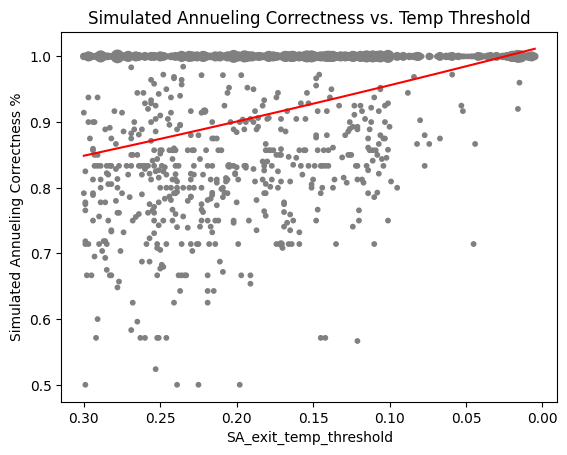

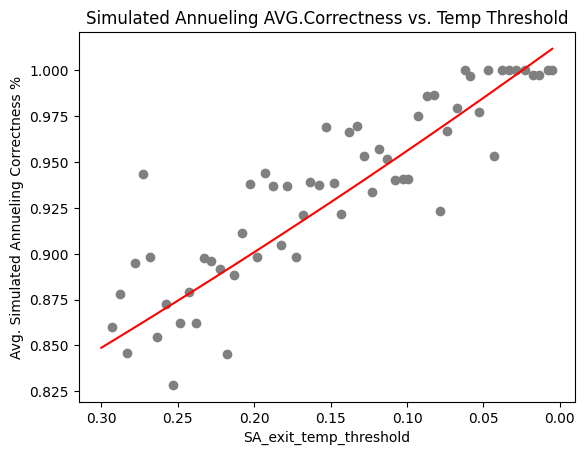

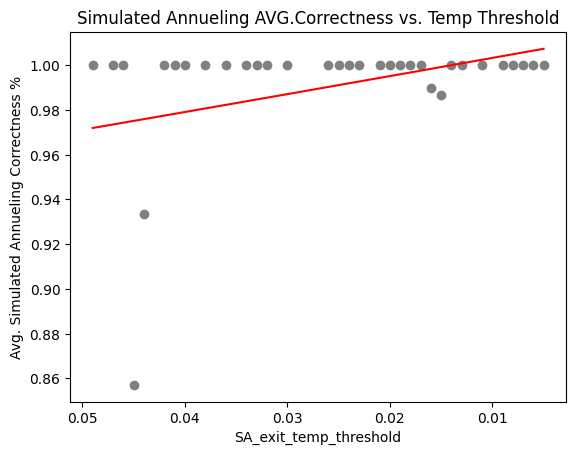

In [122]:
#exclude outliers
df1 = df[df['SA_Correctness'] >= 0.5]
#df1 = df

# Select columns to plot
x1 = df1['temp_threshold']
y1 = df1['SA_Correctness']

# Get counts of each unique combination of x and y values
counts1 = df1.groupby(['temp_threshold', 'SA_Correctness']).size().reset_index(name='count')

# Set colors
color1 = 'grey'
line_color = 'yellow'

# Create scatter plot with point sizes based on count values
plt.scatter(x=counts1['temp_threshold'], y=counts1['SA_Correctness'], s=counts1['count']*10, label='thresh_v_Correct', color=color1)

# Add axis labels and title
plt.xlabel('SA_exit_temp_threshold')
plt.ylabel('Simulated Annueling Correctness %')
plt.title('Simulated Annueling Correctness vs. Temp Threshold')

#create exponential best fit line
p1 = np.polyfit(x1, np.log(y1), 1)
a1 = np.exp(p1[1])
b1 = p1[0]

# Plot the exponential best-fit line
x_fit1 = np.linspace(x1.min(), x1.max(), 1000)
y_fit1 = a1 * np.exp(b1 * x_fit1)
plt.plot(x_fit1, y_fit1, 'r-', label='Exponential Best Fit')


plt.gca().invert_xaxis()
# Show the graph
plt.show()


### FOR GRAPH 2 ###

#exclude outliers
df1 = df[df['temp_threshold'] <= 0.3]
#df1 = df

# Select columns to plot
x1 = df1['temp_threshold']
y1 = df1['SA_Correctness']

# Set the bin size for the x axis
bins = np.arange(0,0.3,0.005)

# Get counts of each unique combination of x and y values
averages_df = df.groupby(pd.cut(x1, bins=bins)).mean().reset_index(drop=True)

# Set colors
color1 = 'grey'
line_color = 'yellow'

# Create scatter plot with point sizes based on count values
plt.scatter(x=averages_df['temp_threshold'], y=averages_df['SA_Correctness'], label='thresh_v_Correct', color=color1)

# Add axis labels and title
plt.xlabel('SA_exit_temp_threshold')
plt.ylabel('Avg. Simulated Annueling Correctness %')
plt.title('Simulated Annueling AVG.Correctness vs. Temp Threshold')

#create exponential best fit line
p1 = np.polyfit(x1, np.log(y1), 1)
a1 = np.exp(p1[1])
b1 = p1[0]

# Plot the exponential best-fit line
x_fit1 = np.linspace(x1.min(), x1.max(), 1000)
y_fit1 = a1 * np.exp(b1 * x_fit1)
plt.plot(x_fit1, y_fit1, 'r-', label='Exponential Best Fit')


plt.gca().invert_xaxis()
# Show the graph
plt.show()


### FOR GRAPH 3 ###
### FOR GRAPH 2 ###

#exclude outliers
df1 = df[df['temp_threshold'] <= 0.05]
#df1 = df

# Select columns to plot
x1 = df1['temp_threshold']
y1 = df1['SA_Correctness']

# Set the bin size for the x axis
bins = np.arange(0,0.051,0.001)

# Get counts of each unique combination of x and y values
averages_df = df.groupby(pd.cut(x1, bins=bins)).mean().reset_index(drop=True)

# Set colors
color1 = 'grey'
line_color = 'yellow'

# Create scatter plot with point sizes based on count values
plt.scatter(x=averages_df['temp_threshold'], y=averages_df['SA_Correctness'], label='thresh_v_Correct', color=color1)

# Add axis labels and title
plt.xlabel('SA_exit_temp_threshold')
plt.ylabel('Avg. Simulated Annueling Correctness %')
plt.title('Simulated Annueling AVG.Correctness vs. Temp Threshold')

#create exponential best fit line
p1 = np.polyfit(x1, np.log(y1), 1)
a1 = np.exp(p1[1])
b1 = p1[0]

# Plot the exponential best-fit line
x_fit1 = np.linspace(x1.min(), x1.max(), 1000)
y_fit1 = a1 * np.exp(b1 * x_fit1)
plt.plot(x_fit1, y_fit1, 'r-', label='Exponential Best Fit')


plt.gca().invert_xaxis()
# Show the graph
plt.show()

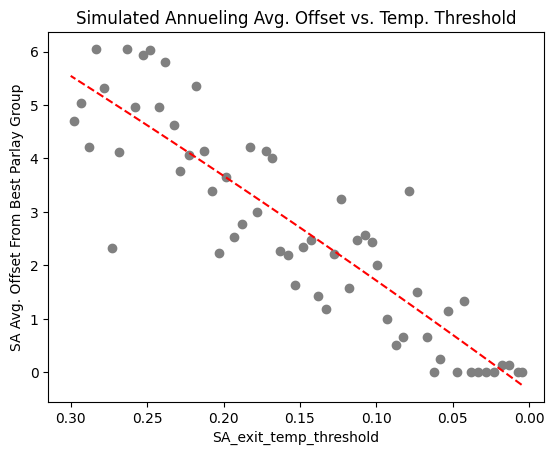

In [89]:
# Select columns to plot
x = df['temp_threshold']
y = df['SA_Offset']

# Set the bin size for the x axis
bins = np.arange(0,2.5,0.005)

# Get counts of each unique combination of x and y values
counts = df.groupby(['temp_threshold', 'SA_Offset']).size().reset_index(name='count')
averages_df = df.groupby(pd.cut(x, bins=bins)).mean().reset_index(drop=True)

# Set colors
color1 = 'grey'
line_color = 'yellow'

# Create scatter plot with point sizes based on count values
plt.scatter(x=averages_df['temp_threshold'], y=averages_df['SA_Offset'], label='thresh_v_Offset', color=color1)

# Add axis labels and title
plt.xlabel('SA_exit_temp_threshold')
plt.ylabel('SA Avg. Offset From Best Parlay Group')
plt.title('Simulated Annueling Avg. Offset vs. Temp. Threshold')

# Add quadratic best fit line
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
xp = np.linspace(x.min(), x.max(), 100)
plt.plot(xp, p(xp), "r--")

plt.gca().invert_xaxis()
# Show the graph
plt.show()

In [224]:
# Load CSV file into a DataFrame
df10 = pd.read_csv('SA_MP_testingData_g10+.csv')

# Display the DataFrame
df10

,Test_ID,numGames,numParlays,runtime
0,0,11,4,5.0230
1,1,15,4,6.1710
2,2,14,5,16.6606
3,3,13,4,5.5059
4,4,14,2,1.1142
...,...,...,...,...
295,295,6,5,9.9503
296,296,8,4,5.5455
297,297,5,2,0.5979
298,298,5,2,0.5726


In [225]:
# Load CSV file into a DataFrame
df10BF = pd.read_csv('SA_MP_testingData_g10+BF.csv')

# Display the DataFrame
df10BF

,Test_ID,numGames,numParlays,runtime
0,0,11,2,7.5479
1,1,5,3,0.0022
2,2,11,3,7.9457
3,3,12,2,34.6318
4,4,7,3,0.0209
...,...,...,...,...
295,295,5,2,0.0020
296,296,9,2,0.3147
297,297,10,2,1.5275
298,298,6,5,0.0067


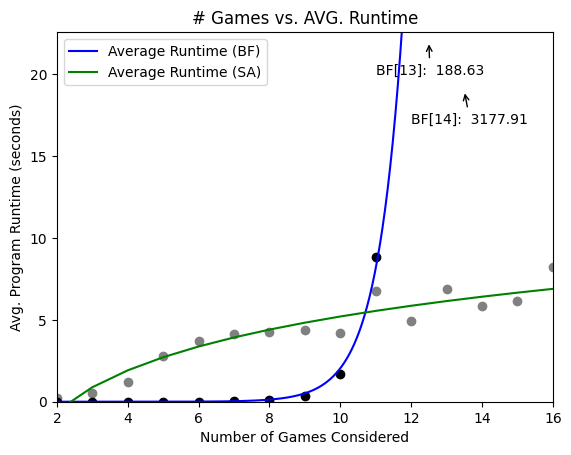

In [264]:
list_1BF = df10BF['numGames']
list_2BF = df10BF['runtime']

# Select columns to plot
x = df10['numGames']
y = df10['runtime']

# Set the bin size for the x axis
bins = np.arange(0,17,1)

# Get counts of each unique combination of x and y values
averages_dfC = df10.groupby(pd.cut(x, bins=bins)).mean().reset_index(drop=True)
averages_dfCA = pd.DataFrame(bins, columns=['numGames'])
averages_dfCA['runtime'] = df10.groupby('numGames')['runtime'].mean()

# Get counts of each unique combination of x and y values
averages_dfBF = df10BF.groupby(pd.cut(list_1BF, bins=bins)).mean().reset_index(drop=True)
averages_dfBFA = pd.DataFrame(bins, columns=['numGames'])
averages_dfBFA['runtime'] = df10BF.groupby('numGames')['runtime'].mean()

# set the x and y limits of the plot
plt.xlim(xmin=2, xmax=16)
plt.ylim(ymin=0, ymax=max(y))


# Create scatter plot with averages
plt.scatter(x=averages_dfC['numGames'], y=averages_dfC['runtime'], color='grey')

# Create scatter plot with averages
plt.scatter(x=averages_dfBF ['numGames'], y=averages_dfBF ['runtime'], color='black')


# Add axis labels and title
plt.xlabel('Number of Games Considered')
plt.ylabel('Avg. Program Runtime (seconds)')
plt.title('# Games vs. AVG. Runtime')

#create exponential best fit line BF
p = np.polyfit(list_1BF, np.log(list_2BF), 1)
a = np.exp(p[1])
b = p[0]

# Plot the exponential best-fit line BF
x_fit = np.linspace(list_1BF.min(), list_1BF.max(), 1000)
y_fit = a * np.exp(b * x_fit)
plt.plot(x_fit, y_fit,c='blue', label='Average Runtime (BF)')

# Add a label for points off the graph
plt.annotate(('BF[13]:  '+ str(round(averages_dfBFA['runtime'][13],2))), xy=(12.5, 22), xytext=(11, 20),arrowprops=dict(facecolor='black', arrowstyle='->'))
dfX = averages_dfC.dropna()


# Add a label for points off the graph
plt.annotate(('BF[14]:  '+ str(round(averages_dfBFA['runtime'][14],2))), xy=(13.5, 19), xytext=(12, 17),arrowprops=dict(facecolor='black', arrowstyle='->'))
dfX = averages_dfC.dropna()


# Fit logarithmic curve using polyfit SA
curve = np.polyfit(np.log(dfX['numGames']),dfX['runtime'], 1)
y_fit = (curve[0] * np.log(dfX['numGames'])) + curve[1]

# Plot the line of best fit SA
plt.plot(dfX['numGames'], y_fit, c='green', label='Average Runtime (SA)')


# add legend
plt.legend()

# Show the graph
plt.show()
